In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Activation
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.layers import Activation
from keras.utils import plot_model

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Подключение диска
#Создание массива

array =[]
with open("/content/drive/My Drive/Colab Notebooks/Data/catemsd_all_noaft_y.txt") as file:
    for line in file:
        array.append([float(x) for x in line.split()])
array = np.array(array, dtype=np.float64)

In [0]:
#Задание длинны тренировочного массива и колличество данных в одной порции

length_test =10
testing_start=50975
number_per_epoch=60
feature_number=3

In [0]:
model_longitude = Sequential()
model_longitude.add(LSTM(units=550, return_sequences= True, input_shape=(number_per_epoch,3)))
model_longitude.add(LSTM(units=550, return_sequences=True))
model_longitude.add(LSTM(units=550))
model_longitude.add(Dense(units=1,activation='linear'))
model_longitude.summary()

model_longitude.compile(optimizer=RMSprop(lr=0.001), loss='mean_squared_error')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 550)           1218800   
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 550)           2422200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 550)               2422200   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 551       
Total params: 6,063,751
Trainable params: 6,063,751
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_time = Sequential()
model_time.add(LSTM(units=650, return_sequences= True, input_shape=(number_per_epoch,3)))

model_time.add(LSTM(units=650, return_sequences=True))

model_time.add(LSTM(units=650))

model_time.add(Dense(units=1,activation='linear'))
model_time.summary()

model_time.compile(optimizer=RMSprop(lr=0.001), loss='mean_squared_error')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 60, 650)           1700400   
_________________________________________________________________
lstm_8 (LSTM)                (None, 60, 650)           3382600   
_________________________________________________________________
lstm_9 (LSTM)                (None, 650)               3382600   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 651       
Total params: 8,466,251
Trainable params: 8,466,251
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_latitude = Sequential()
model_latitude.add(LSTM(units=550, return_sequences= True, input_shape=(number_per_epoch,3)))
model_latitude.add(LSTM(units=550, return_sequences=True))
model_latitude.add(LSTM(units=550))
model_latitude.add(Dense(units=1,activation='linear'))
model_latitude.summary()

model_latitude.compile(optimizer=RMSprop(lr=0.001), loss='mean_squared_error')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 550)           1218800   
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 550)           2422200   
_________________________________________________________________
lstm_6 (LSTM)                (None, 550)               2422200   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 551       
Total params: 6,063,751
Trainable params: 6,063,751
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_latitude.load_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/Latitude/coursework_dims_LSTM_latitude_2.h5')
model_longitude.load_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/Longitude/coursework_dims_LSTM_longitude_3.h5')
model_time.load_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/Time/coursework_dims_LSTM_time_5.h5')

In [0]:
plot_model(model_time,show_shapes=True, to_file='model.png')

In [0]:
plot_model(model_latitude,show_shapes=True, to_file='model.png')

In [0]:
plot_model(model_longitude,show_shapes=True, to_file='model.png')

In [0]:
#Функция подготовки тестого массива
def DataPreparation(length_test,testing_start,number_per_epoch,x_test_latitude,y_test_latitude,x_test_time,y_test_time,x_test_longitude,y_test_longitude,sc_time_test,sc_latitude,sc_longitude,sc_depth,sc_magnitude):
  time_test = np.zeros(shape=(length_test+number_per_epoch,1))
  time = np.zeros(shape=(array.shape[0],1))
  latitude = np.zeros(shape=(array.shape[0],1))
  longitude = np.zeros(shape=(array.shape[0],1))
  depth = np.zeros(shape=(array.shape[0],1))
  magnitude = np.zeros(shape=(array.shape[0],1))
  
  time=time.astype('float64')
  latitude=latitude.astype('float64')
  longitude = longitude.astype('float64')
  depth =depth.astype('float64')
  magnitude =magnitude.astype('float64')

  for i in range(array.shape[0]):
    time[i] = array[i][0]
    latitude[i] = array[i][1]
    longitude[i] = array[i][2]
    depth[i] = array[i][3]
    magnitude[i] = array[i][4]  

  mean_latitude = latitude.mean()
  mean_longitude=longitude.mean()

  for i in range(array.shape[0]):
    longitude[i]=(longitude[i]-mean_longitude)
    latitude[i]=(latitude[i]-mean_latitude)

  for i in range(number_per_epoch+length_test):
    time_test[i]=time[testing_start+i]-time[testing_start+i-1]   

  time_test=sc_time_test.fit_transform(time_test)
  latitude=sc_latitude.fit_transform(latitude)
  longitude=sc_longitude.fit_transform(longitude)
  depth=sc_depth.fit_transform(depth)
  magnitude=sc_magnitude.fit_transform(magnitude)

  for i in range(length_test):
    for j in range(number_per_epoch):
      x_test_longitude[i][j][0]=time_test[i+j] 
      x_test_longitude[i][j][1]=latitude[i+j+testing_start]
      x_test_longitude[i][j][2]=longitude[i+j+testing_start]
    y_test_longitude[i]=longitude[i+j+1+testing_start]

  for i in range(length_test):
    for j in range(number_per_epoch):
      x_test_time[i][j][0]=time_test[i+j] 
      x_test_time[i][j][1]=latitude[i+j+testing_start]
      x_test_time[i][j][2]=longitude[i+j+testing_start]
    y_test_time[i]=time_test[i+j+1]


  for i in range(length_test):
    for j in range(number_per_epoch):
      x_test_latitude[i][j][0]=time_test[i+j] 
      x_test_latitude[i][j][1]=latitude[i+j+testing_start]
      x_test_latitude[i][j][2]=longitude[i+j+testing_start]
    y_test_latitude[i]=latitude[i+j+1+testing_start]

  return mean_latitude,mean_longitude


In [0]:
def Prediction(number_per_epoch,testing_start,length_test,model_time,model_longitude,model_latitude):
  x_test_longitude = np.zeros(shape=(length_test,number_per_epoch,3))
  y_test_longitude=np.zeros(shape=(length_test,1))
  x_test_time = np.zeros(shape=(length_test,number_per_epoch,3))
  y_test_time=np.zeros(shape=(length_test,1))
  x_test_latitude = np.zeros(shape=(length_test,number_per_epoch,3))
  y_test_latitude=np.zeros(shape=(length_test,1))

  x_test_latitude=x_test_latitude.astype('float64')
  y_test_latitude=y_test_latitude.astype('float64')
  x_test_time=x_test_time.astype('float64')
  y_test_time=y_test_time.astype('float64')
  x_test_longitude=x_test_longitude.astype('float64')
  y_test_longitude=y_test_longitude.astype('float64')

  sc_time_test=MinMaxScaler(feature_range=(0,1))
  sc_latitude=MinMaxScaler(feature_range=(-1,1))
  sc_longitude=MinMaxScaler(feature_range=(-1,1))
  sc_depth=MinMaxScaler(feature_range=(0,1))
  sc_magnitude=MinMaxScaler(feature_range=(0,1))

  mean_latitude,mean_longitude=DataPreparation(length_test,testing_start,number_per_epoch,x_test_latitude,y_test_latitude,x_test_time,y_test_time,x_test_longitude,y_test_longitude,sc_time_test,sc_latitude,sc_longitude,sc_depth,sc_magnitude)

  pred_time=model_time.predict(x_test_time)
  pred_longitude=model_longitude.predict(x_test_longitude)
  pred_latitude=model_latitude.predict(x_test_latitude)


  pred_longitude=sc_longitude.inverse_transform(pred_longitude)
  y_test_longitude=sc_longitude.inverse_transform(y_test_longitude)
  pred_latitude=sc_latitude.inverse_transform(pred_latitude) 
  y_test_latitude=sc_latitude.inverse_transform(y_test_latitude)
  pred_time=sc_time_test.inverse_transform(pred_time)
  y_test_time=sc_time_test.inverse_transform(y_test_time)
  
  for i in range(length_test):
    pred_longitude[i]=pred_longitude[i]+mean_longitude
    y_test_longitude[i]=y_test_longitude[i]+mean_longitude
    pred_latitude[i]=pred_latitude[i]+mean_latitude
    y_test_latitude[i]=y_test_latitude[i]+mean_latitude
    pred_time[i] = pred_time[i]*8760
    y_test_time[i]=y_test_time[i]*8760
  
  with open('/content/drive/My Drive/Colab Notebooks/Result/res.txt', 'w') as f:
    for i in range(length_test):
      f.write('Event'+str(i)+':'+'\n'+ 'Predicted: time:'+str(pred_time[i])+'hours sins previous event.Coords:'+str(pred_latitude[i])+'north'+str(pred_longitude[i])+'east'+'\n'+'Real: time:'+str(y_test_time[i])+'hours sins previous event. Coords:'+str(y_test_latitude[i])+'north' +str(y_test_longitude[i])+'east'+'\n')
 

  plt.scatter(pred_latitude,pred_longitude)
  plt.xlabel('Latitude')
  plt.ylabel('Longitude')
  plt.title('Predicted')
  plt.show()

  plt.scatter(y_test_latitude,y_test_longitude,c='orange')
  plt.xlabel('Latitude')
  plt.ylabel('Longitude')
  plt.title('Real')
  plt.show()

  plt.scatter(pred_latitude,pred_longitude, label='Predicted')
  plt.scatter(y_test_latitude,y_test_longitude, label='Real')
  plt.xlabel('Latitude')
  plt.ylabel('Longitude')
  plt.legend(loc='upper left')
  plt.title('Predicted and Real')
  plt.show()

 


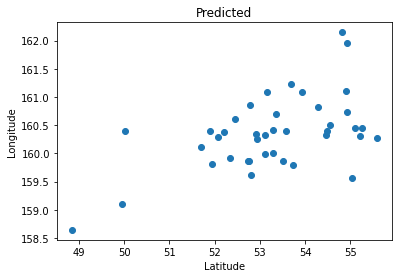

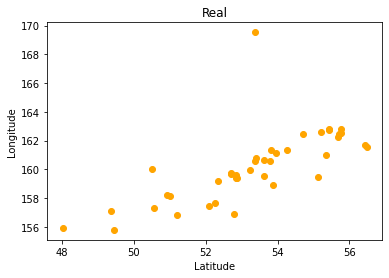

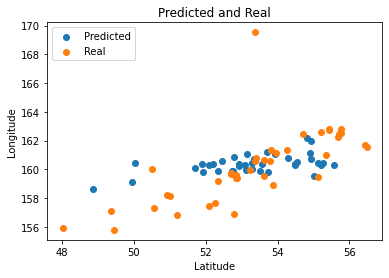

In [0]:

length_test =40
testing_start= 47000
number_per_epoch=60
feature_number=3

Prediction(number_per_epoch,testing_start,length_test,model_time,model_longitude,model_latitude)